In [34]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [35]:
df1 = gpd.read_file('../data/05_2014-2016_kilauea_lava_shapefiles/Ep61e_flow.shp').to_crs(4326)
print(df1.shape)
print(df1.head())

(35, 8)
   OBJECTID  Volcano Region Eruption Episode            Name       Date  \
0         1  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-06-27   
1         2  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-07-18   
2         3  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-07-29   
3         4  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-08-12   
4         5  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-08-22   

                                            geometry  
0  POLYGON ((-155.09585 19.40019, -155.09578 19.4...  
1  MULTIPOLYGON (((-155.10421 19.39279, -155.1041...  
2  MULTIPOLYGON (((-155.09116 19.39908, -155.0911...  
3  MULTIPOLYGON (((-155.0926 19.40582, -155.09261...  
4  MULTIPOLYGON (((-155.08506 19.41109, -155.0850...  


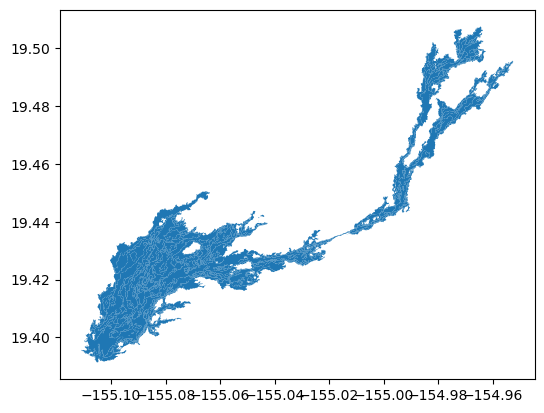

In [36]:
# Generate a visualization of one of the 2014-16 shapefiles
df1.plot()
plt.show()

In [37]:
df2 = gpd.read_file('../data/05_2014-2016_kilauea_lava_shapefiles/Ep61e_flow.dbf')
print(df2.shape)
print(df2.head())

(35, 8)
   OBJECTID  Volcano Region Eruption Episode            Name       Date  \
0         1  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-06-27   
1         2  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-07-18   
2         3  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-07-29   
3         4  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-08-12   
4         5  Kilauea    ERZ   Puu Oo     61e  June 27th flow 2014-08-22   

                                            geometry  
0  POLYGON ((279905.755 2146446.601, 279913.376 2...  
1  MULTIPOLYGON (((279017.71 2145637.029, 279029....  
2  MULTIPOLYGON (((280397.855 2146317.091, 280400...  
3  MULTIPOLYGON (((280255.1 2147065.638, 280254.2...  
4  MULTIPOLYGON (((281053.763 2147639.078, 281054...  


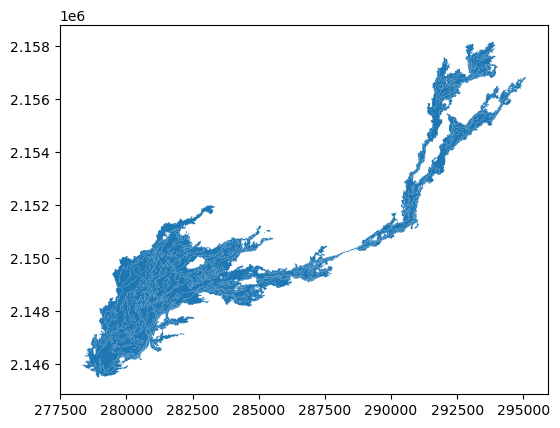

In [38]:
# Generate a visualization of another 2014-16 shapefiles, trying to figure out if these files show the same data in different formats or if they are unique
df2.plot()
plt.show()

In [39]:
so2_path = ("../data/2014-17_SO2_emission_rates/SummitSO2_FLYSPECarray_10S_2014-2017.csv")


In [40]:
df3 = pd.read_csv(so2_path,  usecols=['Date (HST)', 'SO2 flux (t/d)'])

In [41]:
df3["Date (HST)"] = pd.to_datetime(df3["Date (HST)"], format="ISO8601")
df3 = df3.set_index('Date (HST)')
# Replace non-numeric values (like 'BDL') with NaN
df3['SO2 flux (t/d)'] = pd.to_numeric(df3['SO2 flux (t/d)'], errors='coerce')
# Drop rows with NaN
df3 = df3.dropna(subset=['SO2 flux (t/d)'])

In [42]:
df3['SO2 flux (t/d)'] = df3['SO2 flux (t/d)'].astype(int) 

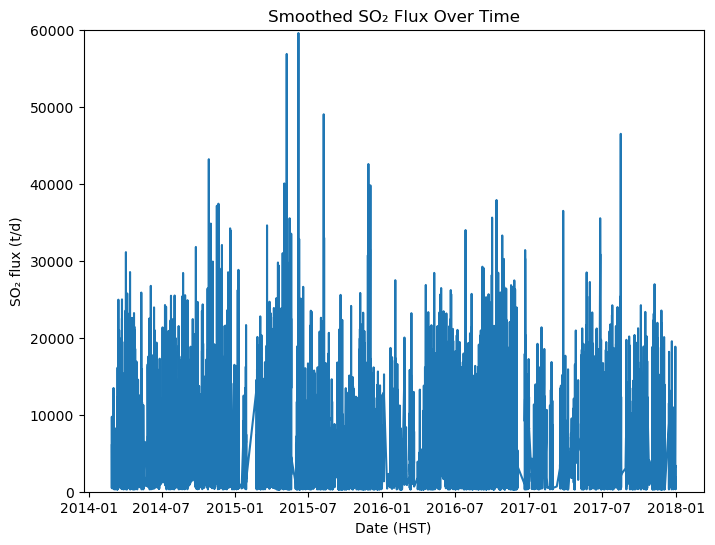

In [43]:
plt.figure(figsize=(8,6))
plt.plot(df3['SO2 flux (t/d)'])
plt.ylabel('SO₂ flux (t/d)')
plt.xlabel('Date (HST)')
plt.ylim(0, 60000)
plt.title('Smoothed SO₂ Flux Over Time')
plt.show()

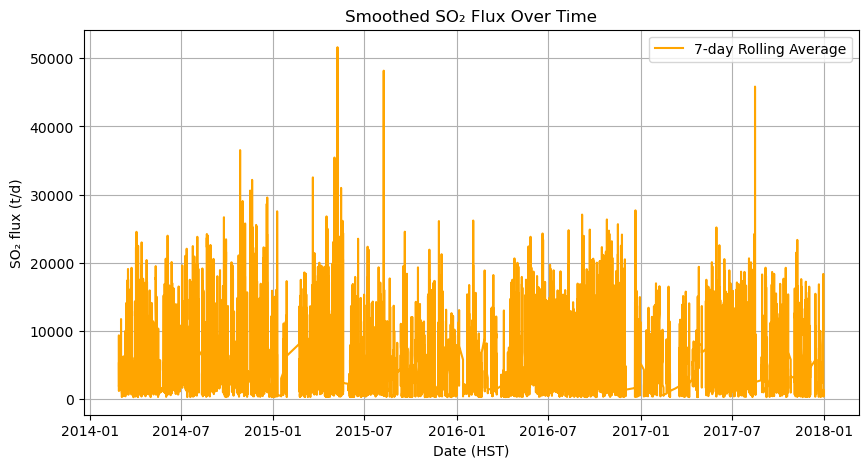

In [44]:
df3['Smoothed'] = df3['SO2 flux (t/d)'].rolling(window=7, center=True).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df3.index, df3['Smoothed'], label='7-day Rolling Average', color='orange')
plt.ylabel('SO₂ flux (t/d)')
plt.xlabel('Date (HST)')
plt.title('Smoothed SO₂ Flux Over Time')
plt.grid(True)
plt.legend()
plt.show()